In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics     #evaluates the model like errros and bugs in comparision


In [ ]:
data=pd.read_csv('/content/car data.csv')

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.shape

(301, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
data.isnull().sum()     #checking the missing values in dataset

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking the distribution of categorial data
print(data.Fuel_Type.value_counts())  #which counts the values of the particular category

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [ ]:
print(data.Seller_Type.value_counts()	)

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [ ]:
print(data.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
# encoding the data
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [ ]:
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [ ]:
#Spliting the data into Training data and Test Data
X=data.drop(['Car_Name','Selling_Price'],axis=1)
Y=data['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
train_data_prediction=lin_reg_model.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train,train_data_prediction)

In [ ]:
print(error_score)

0.8799451660493711


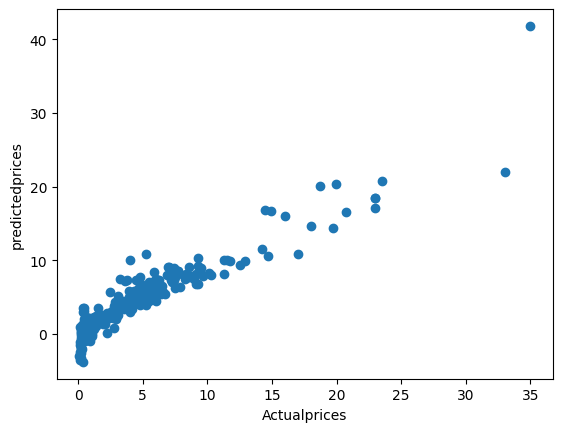

In [ ]:
 #visuallizing the actual prices and predict prices
 plt.scatter(Y_train,train_data_prediction)
 plt.xlabel("Actualprices")
 plt.ylabel("predictedprices")
 plt.show()

In [ ]:
test_data_prediction=lin_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [ ]:
print(error_score)

0.8365766715027051


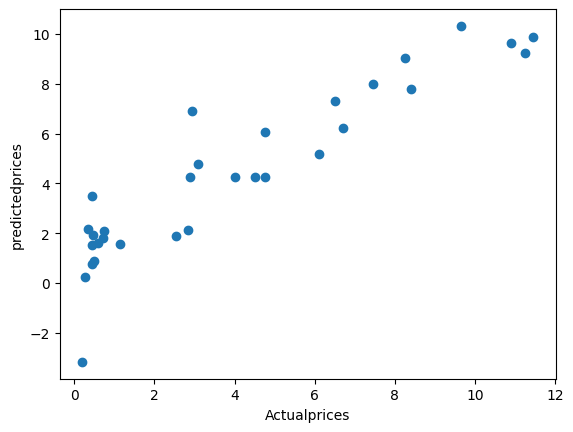

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actualprices")
plt.ylabel("predictedprices")
plt.show()

In [ ]:
las_reg_model=Lasso()
las_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
train_data_prediction=las_reg_model.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train,train_data_prediction)

In [ ]:
print(error_score)

0.8427856123435794


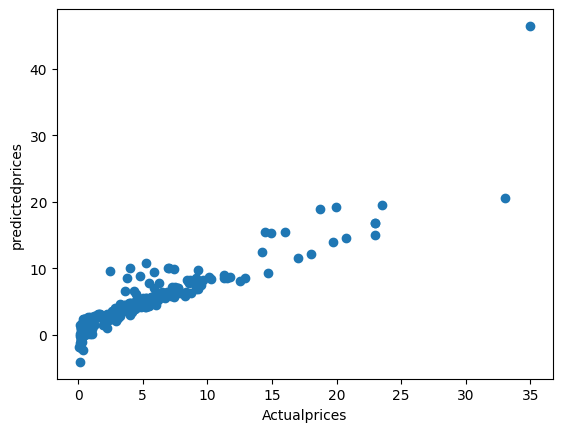

In [ ]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actualprices")
plt.ylabel("predictedprices")
plt.show()

In [ ]:
test_data_prediction=las_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [ ]:
print(error_score)

0.8709167941173195


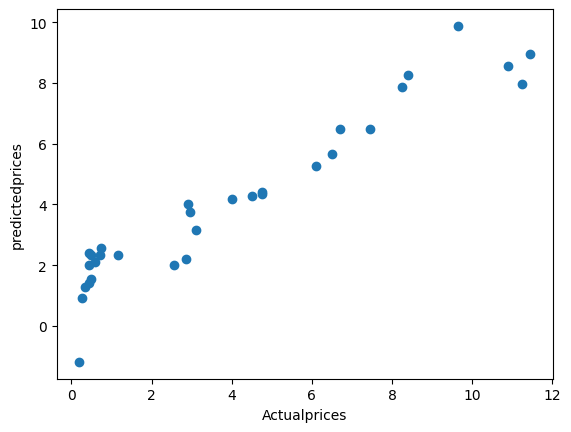

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actualprices")
plt.ylabel("predictedprices")
plt.show()

In [ ]:
def staircase(n):
    # Write your code here\
    for i in range(1,n+1):
        print(""*(n-i)+"#"*i)


n = int(input().strip())

staircase(n)


#
##
###
####
